# PRUEBA NÚMERO DOS DE MINERIA DE DATOS
Instrucciones

*   Primera parte, cuestionario de la materia
  * Deberá responder las preguntas correctamente
---
*   Segunda parte, ejecución técnica de un procedimiento de minería
  * Deberá cargar los datos del CSV a pandas
  * Deberá identificar las columnas relevantes y realizar la unión de los datos
  * Deberá identificar las columnas más relevantes del negocio y proponer una rutina de limpieza
  * Separar la información entre las columnas relevantes y ejecutar su rutina de limpieza
  * Identificar la correlación de las columnas e identificar las más relevantes
  * Proponga 5 gráficos que otorguen valor a los datos y describa el conocimiento que puede extraer de éstos
---
* Tercera parte, proceso de ML

**Requerimiento, haber solucionado correctamente el paso número 2**<br>
**Caso**: La empresa, con el fin de implementar un nuevo plan de marketing ha adquirido un **datamart de clientes** para identificar futuros compradores de sus productos.<br>
Con lo anterior, el minimarket requiere que usted identifique los clientes que actualmente hayan comprado productos de la familia **“OFERTAS ESPECIALES”**. Con ello tambien, crear la columna **Etiqueta** para usarlo en un modelo de **Clasificación**<br>
## Instrucciones
  * Identificar la información a tratar
  * Crear la columna Etiqueta que se usara en el proceso de ML
  * Tratar la información
  * Identificar las carecteristicas más relevante
  * Indice para pruebas = 28%
  * Indice para entrenamiento = 72%
  * Deberá buscar el mejor modelo  de **Clasificación** entre **6 diferentes** y no podra usar ninguno de los siguientes modelos:
    * Logistic regression
    * KNeighborsClassifier
    * DecisionTreeClassifier
  * **Probar el modelo con la información del DataMart**
---
NOTAS:
[Documentación oficial de modelos supervisados](https://scikit-learn.org/stable/supervised_learning.html)






# Parte número 2

## Importar las librerias necesarias para trabajar

In [1]:
%pylab inline
#Importar librerias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Cambiar la presición para mantener una precisión fija
pd.set_option('precision', 5)

# importamos las librerias de ML a usar
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier



Populating the interactive namespace from numpy and matplotlib


## Cargar CSV

In [2]:
# Cargue de los CSV con los nombres menos originales para los DF que se me ocurrieron 
clientes= pd.read_csv("datos_clientes.csv", sep=",")
ventas= pd.read_csv("datos_ventas.csv", sep="|")
trabajadores= pd.read_csv("datos_trabajador.csv", sep=",")
datamart = pd.read_csv("datamart.csv", sep=",")

### He cargado todos los datas de inmediato, incluso elde datamart, realizaré el detalle y análisis de cada una de las tablas

## Análisis rápido de tablas

### Tabla Trabajadores

In [6]:
# Análisis tabla trabajadores
print(trabajadores.head(10))
# Información del DF
print(trabajadores.shape)
# Describiendo el DF
print(trabajadores.describe())
# Conociendo la información
print(trabajadores.info())


   ID  CAJERO_ID  NOMBRE APELLIDO         RUT
0   1          2   Zelda  Wiggins  23730488-8
1   2          3    Kaye     Bird  18659842-3
2   3          4    Sean   Tucker  12534101-2
3   4          5   Ulric   Lester  14004608-6
4   5          7  Hunter    Booth  13030165-7
(5, 5)
            ID  CAJERO_ID
count  5.00000    5.00000
mean   3.00000    4.20000
std    1.58114    1.92354
min    1.00000    2.00000
25%    2.00000    3.00000
50%    3.00000    4.00000
75%    4.00000    5.00000
max    5.00000    7.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5 non-null      int64 
 1   CAJERO_ID  5 non-null      int64 
 2   NOMBRE     5 non-null      object
 3   APELLIDO   5 non-null      object
 4   RUT        5 non-null      object
dtypes: int64(2), object(3)
memory usage: 328.0+ bytes
None


#### Análisis Tabla Trabajadores

* Los trabajores identificados son cajeros
* Son solo 5 trabajadores y conocermos su nombre, apellido y RUT.


### Tabla Clientes

In [7]:
#Análisis de tabla clientes
print(clientes.head(5))
# Información del DF
print(clientes.shape)
# Describiendo el DF
print(clientes.describe())
# Conociendo la información
print(clientes.info())
#Color Favorito 
print(clientes.groupby("Color_F").size())
#Cant Hijos
print(clientes.groupby("cant_hijos").size())
#Idioma
print(clientes.groupby("idioma").size())

   id_cliente primer_nombre apellido_paterno apellido_materno  \
0           1          Ibby           Plewes             Izac   
1           2       Doralia            Ewell         Townsend   
2           3       Lynette         Merrydew       Feaveryear   
3           4        Janaye         Jeffryes           Anglim   
4           5        Travus            Divis       Minchindon   

                         correo  genero          idioma estado_civil  \
0               iizac0@cnbc.com  Female      Lithuanian         Otro   
1              dtownsend1@ow.ly  Female        Armenian        Viudo   
2          lfeaveryear2@aol.com  Female      Papiamento      Soltero   
3            janglim3@ameblo.jp  Female        Georgian       Casado   
4  tminchindon4@sourceforge.net    Male  Northern Sotho       Casado   

   cant_hijos  edad        estudios    Color_F  
0           1     1             RMA    Celeste  
1           2     2  IEX Total View       Azul  
2           3     3          

#### Análisis Tabla Clientes
* 500 registros de clientes
* Todos los clientes tienen hijos
* El color favorito de los clientes es diverso
* Podemos suponer que los clientes son de distintas nacionalidades por sus idiomas.
* Cliente más joven tiene un año y mayor 65 años.
* Llama la atención que hasta los clientes de 1 año tengan hijos, quizá debería supones que  es la edad de los hijos osea tienen hijo de 1 año o  de 65 ( sería un abuelito de más de 90 años el que compra), si tomo eso como referencia la mayoría de los clientes sería adulto mayoro cerca de serlo ya que la media en edad es de 31 años .
* Los clientes varian por un rango de 97 idiomas mini market quizá está en el aeropuerto lo cual explicaría la variedad de idiomas.


### ANALISIS TABLA VENTAS

In [8]:
# Análisis de Ventas
#Análisis de tabla clientes
print(ventas.head(5))
# Información del DF
print(ventas.shape)
# Describiendo el DF
print(ventas.describe())
# Conociendo la información
print(ventas.info())
#Ventas por Familia 
print(ventas.groupby("NOMBRE_FAMILIA").size())



   VENTA_ID  CAJERO_ID  COMPRADOR_ID                  FECHA_VENTA MONTO_TOTAL  \
0        26          7            32  22/08/19 19:43:18,000000000    Q.-1500.   
1        49          7            91  23/08/19 14:08:25,000000000    Q.4050-.   
2        49          7           399  23/08/19 14:08:25,000000000    Q.4050-.   
3        49          7            92  23/08/19 14:08:25,000000000    Q.4050-.   
4        49          7           177  23/08/19 14:08:25,000000000    Q.4050-.   

  CODIGO_PRODUCTO           NOMBRE_PRODUCTO  CODIGO_FAMILIA  \
0   7802215104855                Costa Rama               4   
1   7801810712663  LIPTON YELLOW 40g. 20UN.               1   
2   7802575006035       CORBATAS CARO.400g.               1   
3   7801875032010     TÉ SUPREMO 40g. 20UN.               1   
4   7808743601934      ACEITE MERKAT 900ml.               1   

       NOMBRE_FAMILIA CANTIDAD  
0   CONFITES-GALLETAS      1,0  
1  OFERTAS ESPECIALES      1,0  
2  OFERTAS ESPECIALES      1,0  
3 

#### Análisis Tabla Ventas
* El minimarket no vente frutas o verduras
* El minimarket no vende fiambrería
* Los productos estan separados por tipo de familia.
* La familia con más ventas de Ofertas Especiales
* La familia con menos ventas es  PANADERIA
* Hay campos que podríamos cambiar el Dtype

## Unir los CSV

* Como se trata de 3 tablas , para poder realizar el join , primero tendre que unir 2 tablas que tengan algo en comun y lo que se cree de ese join unir la tercera tabla.
* Primero Unire la tabla con menos columnas que son ventas y trabajador y se creará un nuevo DF.
* Con ese  nuevo DF le uniré la tabla faltante que es cliente 

In [9]:
# Unión de Tablas

#Primero uniré ventas / trabajador
ventas_trabajadores = ventas.merge(trabajadores, how = 'inner',left_on = ['CAJERO_ID'], right_on = ['CAJERO_ID'])
                        
#El nuevo df lo uno con clientes  para df final
df_mini = ventas_trabajadores.merge(clientes, how = 'inner',left_on = ['COMPRADOR_ID'],right_on = ['id_cliente'] )

In [10]:
print(df_mini.head(5))
print(df_mini.head(5))
# Información del DF
print(df_mini.shape)
# Describiendo el DF
print(df_mini.describe())
# Conociendo la información
print(df_mini.info())
#Nulos
print(df_mini.isnull().sum())
#Duplicados
print(df_mini.duplicated())


   VENTA_ID  CAJERO_ID  COMPRADOR_ID                  FECHA_VENTA MONTO_TOTAL  \
0        26          7            32  22/08/19 19:43:18,000000000    Q.-1500.   
1      6726          2            32  13/09/19 19:21:03,000000000    Q.-2140.   
2     14399          2            32  27/09/19 22:13:57,000000000    Q.5590-.   
3        49          7            91  23/08/19 14:08:25,000000000    Q.4050-.   
4      1929          7            91  04/09/19 13:24:27,000000000    Q.7750-.   

  CODIGO_PRODUCTO               NOMBRE_PRODUCTO  CODIGO_FAMILIA  \
0   7802215104855                    Costa Rama               4   
1           HUEVO                         Huevo               1   
2   7802810031112  MERMELADA LAGOS DAMASCO 250g               1   
3   7801810712663      LIPTON YELLOW 40g. 20UN.               1   
4   7805000305253       * TRIAL * TRIAL * TRIAL               1   

       NOMBRE_FAMILIA CANTIDAD  ...  apellido_paterno apellido_materno  \
0   CONFITES-GALLETAS      1,0  ... 

## Analice los datos unidos, identifique columnas a limpiar, como columnas a remover
* Dejamos una data de 1753 Registros 
* No hay Duplicados
* No hay datos nulos
* Borrar la columnas que se repitan a causa del MERGE
* Cambiar los Dtype necesarios para poder realizar análisis y gráficos más detallados
* Cambiar algunos nombres de columna para que sea nás fácil identificar y quizá realizar un CONCAT
* Revisar columnas que no tengan relevancia para el análisis de posible compradores.

## Propuesta de limpieza



*  Borrar la columna ID_CLIENTE dejando ID_COMPRADOR,estas vienen del MERGE de las tablas
*  La columna ID viene que trabajador y no es necesaria, porque tenemos el CAJERO_ID
*  Quitar Caracteres extraños en Fecha que tiene despyes de la una ',' com muchos ceros, pensé que podrían ser micro segundos pero probabilisticamente es casi imposible que todad las ventas se hallan realizado en el microsegundo 0.
* Los montos_total  tiene 'Q' '.' '-' en distintas partes y por eso no podré pasarlo a int o float
*  Cambiar en nombre de las columnas de trabajores para diferencias de los de clientes.
*  Concatenar NOMBRE+APELLIDO y eliminaré el rut del Empleado para este análisis, porque como son pocos cajeros solo los separare por nombre.
* Hay que realizar cambios de Dtype, por ejemplo la fecha, monto total y cantidad no queden como object para que la podamos trabajar.
* Pasar a variables de números el estado civil, genero  y colores
* Realizar los cambios altiro en el datamart en los campos de correspondan

In [11]:
#Borre Columna COMPRADOR_ID y así dejo cliente_id  
#Borre la columna ID  que venía de trabajador dejando CAJERO_ID
df_mini=df_mini.drop(['COMPRADOR_ID','ID'],axis=1)  

In [12]:
# Quitar caracteres extraños de FECHA_VENTA
df_mini['FECHA_VENTA'] = df_mini['FECHA_VENTA'].str.replace(',000000000','')
#Cambio de formato a datatime,no tomo datatime solo busque en google y la solución era agregar [ns]
df_mini['FECHA_VENTA'] = df_mini['FECHA_VENTA'].astype('datetime64[ns]')

# Mostrar 5 primeras líneas para ver que funciono el cambio 
print(df_mini.head(5))

   VENTA_ID  CAJERO_ID         FECHA_VENTA MONTO_TOTAL CODIGO_PRODUCTO  \
0        26          7 2019-08-22 19:43:18    Q.-1500.   7802215104855   
1      6726          2 2019-09-13 19:21:03    Q.-2140.           HUEVO   
2     14399          2 2019-09-27 22:13:57    Q.5590-.   7802810031112   
3        49          7 2019-08-23 14:08:25    Q.4050-.   7801810712663   
4      1929          7 2019-04-09 13:24:27    Q.7750-.   7805000305253   

                NOMBRE_PRODUCTO  CODIGO_FAMILIA      NOMBRE_FAMILIA CANTIDAD  \
0                    Costa Rama               4   CONFITES-GALLETAS      1,0   
1                         Huevo               1  OFERTAS ESPECIALES     10,0   
2  MERMELADA LAGOS DAMASCO 250g               1  OFERTAS ESPECIALES      1,0   
3      LIPTON YELLOW 40g. 20UN.               1  OFERTAS ESPECIALES      1,0   
4       * TRIAL * TRIAL * TRIAL               1  OFERTAS ESPECIALES      1,0   

   NOMBRE  ... apellido_paterno apellido_materno               correo  gen

In [13]:
# Quitar caracteres especiales de MONTO_TOTAL
# No funciona solo replace , porque estoy pidiendo un caracter especifico
# no pude tomar altiro todos los caracetes como se hace en replace al parecer str.replace no tiene esa función 
#lo compila pero no genera los cambios.

#cambiar Q a vacio
df_mini['MONTO_TOTAL'] = df_mini['MONTO_TOTAL'].str.replace('Q','') 
#cambiar - a vacios
df_mini['MONTO_TOTAL'] = df_mini['MONTO_TOTAL'].str.replace('-','') 
# cambiar . a vacios
df_mini['MONTO_TOTAL'] = df_mini['MONTO_TOTAL'].str.replace('.','') 
# hay un monto con con ',', que debe ser un decimal y python tomas los decimales como punto
df_mini['MONTO_TOTAL'] = df_mini['MONTO_TOTAL'].str.replace(',','.')
#Lo dejare en Dtype Float
df_mini['MONTO_TOTAL'] = df_mini['MONTO_TOTAL'].astype(float)
# Mostrar 5 primeras líneas para ver que funciono el cambio 
df_mini.head(5)

,VENTA_ID,CAJERO_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD,NOMBRE,...,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,26,7,2019-08-22 19:43:18,1500.0,7802215104855,Costa Rama,4,CONFITES-GALLETAS,"1,0",Hunter,...,Palia,Pretsel,jpretselv@army.mil,Male,Pashto,Viudo,4,32,Adobe Creative Suite,Azul
1,6726,2,2019-09-13 19:21:03,2140.0,HUEVO,Huevo,1,OFERTAS ESPECIALES,"10,0",Zelda,...,Palia,Pretsel,jpretselv@army.mil,Male,Pashto,Viudo,4,32,Adobe Creative Suite,Azul
2,14399,2,2019-09-27 22:13:57,5590.0,7802810031112,MERMELADA LAGOS DAMASCO 250g,1,OFERTAS ESPECIALES,"1,0",Zelda,...,Palia,Pretsel,jpretselv@army.mil,Male,Pashto,Viudo,4,32,Adobe Creative Suite,Azul
3,49,7,2019-08-23 14:08:25,4050.0,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0",Hunter,...,Quaife,Maude,dmaude2i@meetup.com,Female,Dhivehi,Casado,3,26,RV,Rojo
4,1929,7,2019-04-09 13:24:27,7750.0,7805000305253,* TRIAL * TRIAL * TRIAL,1,OFERTAS ESPECIALES,"1,0",Hunter,...,Quaife,Maude,dmaude2i@meetup.com,Female,Dhivehi,Casado,3,26,RV,Rojo


In [16]:
#Creo Columna concatenando Nombre y Apellido de Cajero
df_mini['Nombre_Cajero'] = df_mini ['NOMBRE']+' '+df_mini['APELLIDO']
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   VENTA_ID          1753 non-null   int64         
 1   CAJERO_ID         1753 non-null   int64         
 2   FECHA_VENTA       1753 non-null   datetime64[ns]
 3   MONTO_TOTAL       1753 non-null   float64       
 4   CODIGO_PRODUCTO   1753 non-null   object        
 5   NOMBRE_PRODUCTO   1753 non-null   object        
 6   CODIGO_FAMILIA    1753 non-null   int64         
 7   NOMBRE_FAMILIA    1753 non-null   object        
 8   CANTIDAD          1753 non-null   object        
 9   NOMBRE            1753 non-null   object        
 10  APELLIDO          1753 non-null   object        
 11  RUT               1753 non-null   object        
 12  id_cliente        1753 non-null   int64         
 13  primer_nombre     1753 non-null   object        
 14  apellido_paterno  1753 n

In [17]:
#Borro las columnas desde donde concaquetene
df_mini=df_mini.drop(['NOMBRE','APELLIDO',],axis=1)  
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   VENTA_ID          1753 non-null   int64         
 1   CAJERO_ID         1753 non-null   int64         
 2   FECHA_VENTA       1753 non-null   datetime64[ns]
 3   MONTO_TOTAL       1753 non-null   float64       
 4   CODIGO_PRODUCTO   1753 non-null   object        
 5   NOMBRE_PRODUCTO   1753 non-null   object        
 6   CODIGO_FAMILIA    1753 non-null   int64         
 7   NOMBRE_FAMILIA    1753 non-null   object        
 8   CANTIDAD          1753 non-null   object        
 9   RUT               1753 non-null   object        
 10  id_cliente        1753 non-null   int64         
 11  primer_nombre     1753 non-null   object        
 12  apellido_paterno  1753 non-null   object        
 13  apellido_materno  1753 non-null   object        
 14  correo            1753 n

In [18]:
#BORRO COLUMNAS QUE NO OCUPARE
df_mini=df_mini.drop(['RUT'],axis=1)  
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   VENTA_ID          1753 non-null   int64         
 1   CAJERO_ID         1753 non-null   int64         
 2   FECHA_VENTA       1753 non-null   datetime64[ns]
 3   MONTO_TOTAL       1753 non-null   float64       
 4   CODIGO_PRODUCTO   1753 non-null   object        
 5   NOMBRE_PRODUCTO   1753 non-null   object        
 6   CODIGO_FAMILIA    1753 non-null   int64         
 7   NOMBRE_FAMILIA    1753 non-null   object        
 8   CANTIDAD          1753 non-null   object        
 9   id_cliente        1753 non-null   int64         
 10  primer_nombre     1753 non-null   object        
 11  apellido_paterno  1753 non-null   object        
 12  apellido_materno  1753 non-null   object        
 13  correo            1753 non-null   object        
 14  genero            1753 n

In [19]:
# hay un monto con con ',', que debe ser un decimal y python tomas los decimales como punto
df_mini['CANTIDAD'] = df_mini['CANTIDAD'].str.replace(',','.')
df_mini['CANTIDAD'] = df_mini['CANTIDAD'].astype(float)

In [20]:
#Transformar colores a int para poder analizarlos  en data conjunta 
df_mini['Color_F'].replace({"Amarrillo": "1","Azul": "2", "Celeste": "3", "Morado": "4", "Rojo": "5", "Verde": "6", "Otro": "7"}, inplace = True)
df_mini['Color_F'] = df_mini['Color_F'].astype('float') #Pasarlo a FLOAT
df_mini

,VENTA_ID,CAJERO_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD,id_cliente,...,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F,Nombre_Cajero
0,26,7,2019-08-22 19:43:18,1500.0,7802215104855,Costa Rama,4,CONFITES-GALLETAS,1.0,32,...,Pretsel,jpretselv@army.mil,Male,Pashto,Viudo,4,32,Adobe Creative Suite,2.0,Hunter Booth
1,6726,2,2019-09-13 19:21:03,2140.0,HUEVO,Huevo,1,OFERTAS ESPECIALES,10.0,32,...,Pretsel,jpretselv@army.mil,Male,Pashto,Viudo,4,32,Adobe Creative Suite,2.0,Zelda Wiggins
2,14399,2,2019-09-27 22:13:57,5590.0,7802810031112,MERMELADA LAGOS DAMASCO 250g,1,OFERTAS ESPECIALES,1.0,32,...,Pretsel,jpretselv@army.mil,Male,Pashto,Viudo,4,32,Adobe Creative Suite,2.0,Zelda Wiggins
3,49,7,2019-08-23 14:08:25,4050.0,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,Female,Dhivehi,Casado,3,26,RV,5.0,Hunter Booth
4,1929,7,2019-04-09 13:24:27,7750.0,7805000305253,* TRIAL * TRIAL * TRIAL,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,Female,Dhivehi,Casado,3,26,RV,5.0,Hunter Booth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,49942,2,2019-11-28 14:30:50,1250.0,7801610001295,COCACOLA ORIGINAL RETORNABLE 2.0L,11,BEBIDAS COCA COLA,1.0,230,...,Statham,astatham6d@mashable.com,Female,Swahili,Casado,2,35,Unit Testing,2.0,Zelda Wiggins
1749,550,3,2019-01-09 19:22:58,9790.0,7801610001165,COCACOLA RETORNABLE ORIGINAL 1.25L.,11,BEBIDAS COCA COLA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,Female,Hebrew,Viudo,2,36,SRDS,3.0,Kaye Bird
1750,692,3,2019-01-09 21:28:42,5430.0,7806500507956,CONFORT NOBLE,10,ART.LIMPIEZA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,Female,Hebrew,Viudo,2,36,SRDS,3.0,Kaye Bird
1751,690,3,2019-01-09 21:24:34,900.0,7801505231912,* TRIAL * TRIAL *,1,OFERTAS ESPECIALES,1.0,217,...,Glencros,rglencros60@so-net.ne.jp,Male,Maltese,Viudo,1,22,Digital Marketing,4.0,Kaye Bird


In [23]:
#Transformar colores a int para poder analizarlos  en datamart
#Dato Freak dice Amarrillo no Amarillo, pero como lo cambiaréa números ignorare eso.
datamart['Color_F'].replace({"Amarrillo": "1","Azul": "2", "Celeste": "3", "Morado": "4", "Rojo": "5", "Verde": "6", "Otro": "7"}, inplace = True)
datamart['Color_F'] = datamart['Color_F'].astype('float') #Pasarlo a FLOAT
datamart

,id_cliente,primer_nombre,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,1,Chris,Yelden,Marchello,cmarchello0@geocities.jp,Female,Croatian,Viudo,1,1,Road Safety,7.0
1,2,Rab,Emanson,Cino,rcino1@hud.gov,Male,Dari,Soltero,2,2,Igloo,4.0
2,3,Byron,Mogra,Gethouse,bgethouse2@jugem.jp,Male,Kyrgyz,Otro,3,3,International Sales,4.0
3,4,Rance,Avard,Fiddy,rfiddy3@blinklist.com,Male,Sotho,Soltero,4,4,PVTsim,3.0
4,5,Dani,McGall,Mc Carrick,dmccarrick4@goo.ne.jp,Male,Telugu,Casado,1,5,Brokers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Kathie,Canham,Mayou,kmayourn@nationalgeographic.com,Female,Spanish,Casado,4,21,Xpress,6.0
996,997,Pascale,Squibb,Simmig,psimmigro@wix.com,Male,Japanese,Casado,1,22,PC building,3.0
997,998,Fabien,Martinho,Taverner,ftavernerrp@hp.com,Male,Croatian,Otro,2,23,TDA,7.0
998,999,Agnella,Ivancevic,Manna,amannarq@dot.gov,Female,New Zealand Sign Language,Casado,3,24,CQA,6.0


In [24]:
#Cambio de estado civil a números en df conjunta
df_mini['estado_civil'].replace({"Soltero": "1","Casado": "2", "Viudo": "3", "Otro": "4"}, inplace = True)
df_mini['estado_civil'] = df_mini['estado_civil'].astype('float') #Pasarlo a FLOAT
df_mini

,VENTA_ID,CAJERO_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD,id_cliente,...,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F,Nombre_Cajero
0,26,7,2019-08-22 19:43:18,1500.0,7802215104855,Costa Rama,4,CONFITES-GALLETAS,1.0,32,...,Pretsel,jpretselv@army.mil,Male,Pashto,3.0,4,32,Adobe Creative Suite,2.0,Hunter Booth
1,6726,2,2019-09-13 19:21:03,2140.0,HUEVO,Huevo,1,OFERTAS ESPECIALES,10.0,32,...,Pretsel,jpretselv@army.mil,Male,Pashto,3.0,4,32,Adobe Creative Suite,2.0,Zelda Wiggins
2,14399,2,2019-09-27 22:13:57,5590.0,7802810031112,MERMELADA LAGOS DAMASCO 250g,1,OFERTAS ESPECIALES,1.0,32,...,Pretsel,jpretselv@army.mil,Male,Pashto,3.0,4,32,Adobe Creative Suite,2.0,Zelda Wiggins
3,49,7,2019-08-23 14:08:25,4050.0,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,Female,Dhivehi,2.0,3,26,RV,5.0,Hunter Booth
4,1929,7,2019-04-09 13:24:27,7750.0,7805000305253,* TRIAL * TRIAL * TRIAL,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,Female,Dhivehi,2.0,3,26,RV,5.0,Hunter Booth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,49942,2,2019-11-28 14:30:50,1250.0,7801610001295,COCACOLA ORIGINAL RETORNABLE 2.0L,11,BEBIDAS COCA COLA,1.0,230,...,Statham,astatham6d@mashable.com,Female,Swahili,2.0,2,35,Unit Testing,2.0,Zelda Wiggins
1749,550,3,2019-01-09 19:22:58,9790.0,7801610001165,COCACOLA RETORNABLE ORIGINAL 1.25L.,11,BEBIDAS COCA COLA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,Female,Hebrew,3.0,2,36,SRDS,3.0,Kaye Bird
1750,692,3,2019-01-09 21:28:42,5430.0,7806500507956,CONFORT NOBLE,10,ART.LIMPIEZA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,Female,Hebrew,3.0,2,36,SRDS,3.0,Kaye Bird
1751,690,3,2019-01-09 21:24:34,900.0,7801505231912,* TRIAL * TRIAL *,1,OFERTAS ESPECIALES,1.0,217,...,Glencros,rglencros60@so-net.ne.jp,Male,Maltese,3.0,1,22,Digital Marketing,4.0,Kaye Bird


In [25]:
#Cambio de estado civil a números en datamart
datamart['estado_civil'].replace({"Soltero": "1","Casado": "2", "Viudo": "3", "Otro": "4"}, inplace = True)
datamart['estado_civil'] = datamart['estado_civil'].astype('float') #Pasarlo a FLOAT
datamart

,id_cliente,primer_nombre,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,1,Chris,Yelden,Marchello,cmarchello0@geocities.jp,Female,Croatian,3.0,1,1,Road Safety,7.0
1,2,Rab,Emanson,Cino,rcino1@hud.gov,Male,Dari,1.0,2,2,Igloo,4.0
2,3,Byron,Mogra,Gethouse,bgethouse2@jugem.jp,Male,Kyrgyz,4.0,3,3,International Sales,4.0
3,4,Rance,Avard,Fiddy,rfiddy3@blinklist.com,Male,Sotho,1.0,4,4,PVTsim,3.0
4,5,Dani,McGall,Mc Carrick,dmccarrick4@goo.ne.jp,Male,Telugu,2.0,1,5,Brokers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Kathie,Canham,Mayou,kmayourn@nationalgeographic.com,Female,Spanish,2.0,4,21,Xpress,6.0
996,997,Pascale,Squibb,Simmig,psimmigro@wix.com,Male,Japanese,2.0,1,22,PC building,3.0
997,998,Fabien,Martinho,Taverner,ftavernerrp@hp.com,Male,Croatian,4.0,2,23,TDA,7.0
998,999,Agnella,Ivancevic,Manna,amannarq@dot.gov,Female,New Zealand Sign Language,2.0,3,24,CQA,6.0


In [26]:
#Cambio de estado civil a números en datamart
df_mini['genero'].replace({"Female": "1","Male": "2"}, inplace = True)
df_mini['genero'] = df_mini['genero'].astype('float') #Pasarlo a FLOAT
df_mini

,VENTA_ID,CAJERO_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD,id_cliente,...,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F,Nombre_Cajero
0,26,7,2019-08-22 19:43:18,1500.0,7802215104855,Costa Rama,4,CONFITES-GALLETAS,1.0,32,...,Pretsel,jpretselv@army.mil,2.0,Pashto,3.0,4,32,Adobe Creative Suite,2.0,Hunter Booth
1,6726,2,2019-09-13 19:21:03,2140.0,HUEVO,Huevo,1,OFERTAS ESPECIALES,10.0,32,...,Pretsel,jpretselv@army.mil,2.0,Pashto,3.0,4,32,Adobe Creative Suite,2.0,Zelda Wiggins
2,14399,2,2019-09-27 22:13:57,5590.0,7802810031112,MERMELADA LAGOS DAMASCO 250g,1,OFERTAS ESPECIALES,1.0,32,...,Pretsel,jpretselv@army.mil,2.0,Pashto,3.0,4,32,Adobe Creative Suite,2.0,Zelda Wiggins
3,49,7,2019-08-23 14:08:25,4050.0,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3,26,RV,5.0,Hunter Booth
4,1929,7,2019-04-09 13:24:27,7750.0,7805000305253,* TRIAL * TRIAL * TRIAL,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3,26,RV,5.0,Hunter Booth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,49942,2,2019-11-28 14:30:50,1250.0,7801610001295,COCACOLA ORIGINAL RETORNABLE 2.0L,11,BEBIDAS COCA COLA,1.0,230,...,Statham,astatham6d@mashable.com,1.0,Swahili,2.0,2,35,Unit Testing,2.0,Zelda Wiggins
1749,550,3,2019-01-09 19:22:58,9790.0,7801610001165,COCACOLA RETORNABLE ORIGINAL 1.25L.,11,BEBIDAS COCA COLA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,1.0,Hebrew,3.0,2,36,SRDS,3.0,Kaye Bird
1750,692,3,2019-01-09 21:28:42,5430.0,7806500507956,CONFORT NOBLE,10,ART.LIMPIEZA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,1.0,Hebrew,3.0,2,36,SRDS,3.0,Kaye Bird
1751,690,3,2019-01-09 21:24:34,900.0,7801505231912,* TRIAL * TRIAL *,1,OFERTAS ESPECIALES,1.0,217,...,Glencros,rglencros60@so-net.ne.jp,2.0,Maltese,3.0,1,22,Digital Marketing,4.0,Kaye Bird


In [31]:
datamart['genero'].replace({"Female": "1","Male": "2"}, inplace = True)
datamart['genero'] = datamart['genero'].astype('float') #Pasarlo a FLOAT
datamart

,id_cliente,primer_nombre,apellido_paterno,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F
0,1,Chris,Yelden,Marchello,cmarchello0@geocities.jp,1.0,Croatian,3.0,1.0,1,Road Safety,7.0
1,2,Rab,Emanson,Cino,rcino1@hud.gov,2.0,Dari,1.0,2.0,2,Igloo,4.0
2,3,Byron,Mogra,Gethouse,bgethouse2@jugem.jp,2.0,Kyrgyz,4.0,3.0,3,International Sales,4.0
3,4,Rance,Avard,Fiddy,rfiddy3@blinklist.com,2.0,Sotho,1.0,4.0,4,PVTsim,3.0
4,5,Dani,McGall,Mc Carrick,dmccarrick4@goo.ne.jp,2.0,Telugu,2.0,1.0,5,Brokers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Kathie,Canham,Mayou,kmayourn@nationalgeographic.com,1.0,Spanish,2.0,4.0,21,Xpress,6.0
996,997,Pascale,Squibb,Simmig,psimmigro@wix.com,2.0,Japanese,2.0,1.0,22,PC building,3.0
997,998,Fabien,Martinho,Taverner,ftavernerrp@hp.com,2.0,Croatian,4.0,2.0,23,TDA,7.0
998,999,Agnella,Ivancevic,Manna,amannarq@dot.gov,1.0,New Zealand Sign Language,2.0,3.0,24,CQA,6.0


In [29]:
#Cambio de cantidad hijos  a float 
df_mini['cant_hijos'] = df_mini['cant_hijos'].astype('float') #Pasarlo a FLOAT
datamart['cant_hijos'] = datamart['cant_hijos'].astype('float') #Pasarlo a FLOAT
datamart
df_mini

,VENTA_ID,CAJERO_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD,id_cliente,...,apellido_materno,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F,Nombre_Cajero
0,26,7,2019-08-22 19:43:18,1500.0,7802215104855,Costa Rama,4,CONFITES-GALLETAS,1.0,32,...,Pretsel,jpretselv@army.mil,2.0,Pashto,3.0,4.0,32,Adobe Creative Suite,2.0,Hunter Booth
1,6726,2,2019-09-13 19:21:03,2140.0,HUEVO,Huevo,1,OFERTAS ESPECIALES,10.0,32,...,Pretsel,jpretselv@army.mil,2.0,Pashto,3.0,4.0,32,Adobe Creative Suite,2.0,Zelda Wiggins
2,14399,2,2019-09-27 22:13:57,5590.0,7802810031112,MERMELADA LAGOS DAMASCO 250g,1,OFERTAS ESPECIALES,1.0,32,...,Pretsel,jpretselv@army.mil,2.0,Pashto,3.0,4.0,32,Adobe Creative Suite,2.0,Zelda Wiggins
3,49,7,2019-08-23 14:08:25,4050.0,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Hunter Booth
4,1929,7,2019-04-09 13:24:27,7750.0,7805000305253,* TRIAL * TRIAL * TRIAL,1,OFERTAS ESPECIALES,1.0,91,...,Maude,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Hunter Booth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,49942,2,2019-11-28 14:30:50,1250.0,7801610001295,COCACOLA ORIGINAL RETORNABLE 2.0L,11,BEBIDAS COCA COLA,1.0,230,...,Statham,astatham6d@mashable.com,1.0,Swahili,2.0,2.0,35,Unit Testing,2.0,Zelda Wiggins
1749,550,3,2019-01-09 19:22:58,9790.0,7801610001165,COCACOLA RETORNABLE ORIGINAL 1.25L.,11,BEBIDAS COCA COLA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,1.0,Hebrew,3.0,2.0,36,SRDS,3.0,Kaye Bird
1750,692,3,2019-01-09 21:28:42,5430.0,7806500507956,CONFORT NOBLE,10,ART.LIMPIEZA,1.0,166,...,Durbann,adurbann4l@friendfeed.com,1.0,Hebrew,3.0,2.0,36,SRDS,3.0,Kaye Bird
1751,690,3,2019-01-09 21:24:34,900.0,7801505231912,* TRIAL * TRIAL *,1,OFERTAS ESPECIALES,1.0,217,...,Glencros,rglencros60@so-net.ne.jp,2.0,Maltese,3.0,1.0,22,Digital Marketing,4.0,Kaye Bird


## Identificación de correlación en las columnas

Text(0.5, 0.98, 'CORRELACIÓN DATOS MINIMARKET V.1')

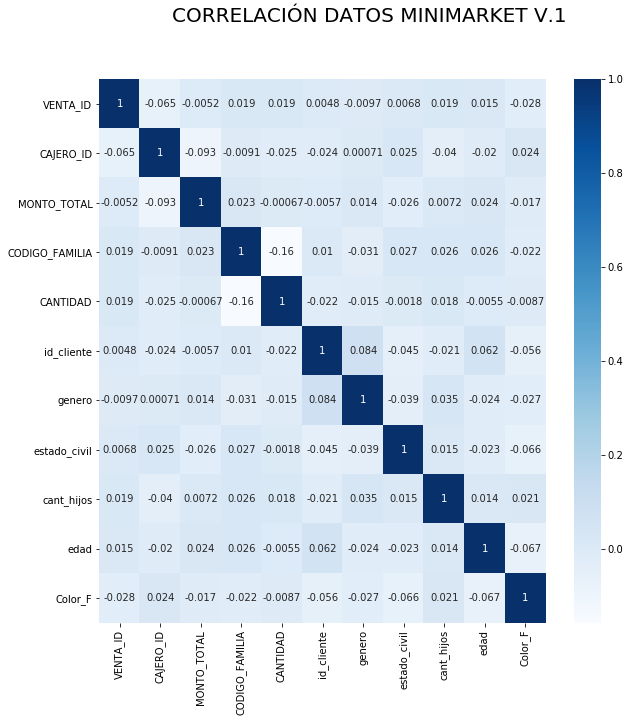

In [32]:
df_mini=pd.DataFrame(df_mini)
plt.rcParams['figure.figsize']=10,10
var_corr=df_mini.corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns,cmap="Blues", annot=True)
suptitle('CORRELACIÓN DATOS MINIMARKET V.1', size=20) # titulo

#### **ANALISIS CORRELACIÓN DE DATOS**
* Venta Id es un dato importante poder realizar gráficos en realacióna  la cantidad de ventas
* Las correlaciones bajas me hacen asumir que exiten datos  ingresados de forma automática , ya que el monto ventas y el vendedor tiene correlaciones muy cercanas a cero

Text(0.5, 0.98, 'CORRELACIÓN DATOS DATAMART ')

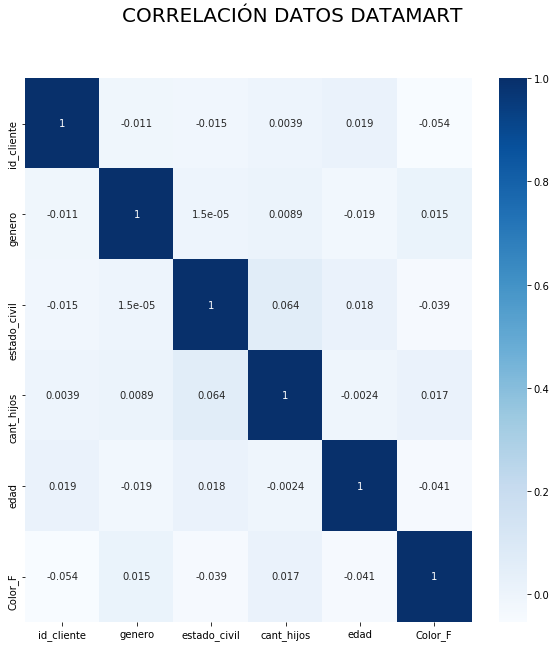

In [33]:
datamart=pd.DataFrame(datamart)
plt.rcParams['figure.figsize']=10,10
var_corr=datamart.corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns,cmap="Blues", annot=True)
suptitle('CORRELACIÓN DATOS DATAMART ', size=20) # titulo

## Proponga 5 gráficos que entregan valor al negocio.

1.  Estado Civil de los compradores
2.  Cantidad de Ventas por Cajero
3.  Familia de Producto que más Vende
4.  Visualizar Monto de Ventas por Cajero
5.  Producto más Vendido

## Grafico 1

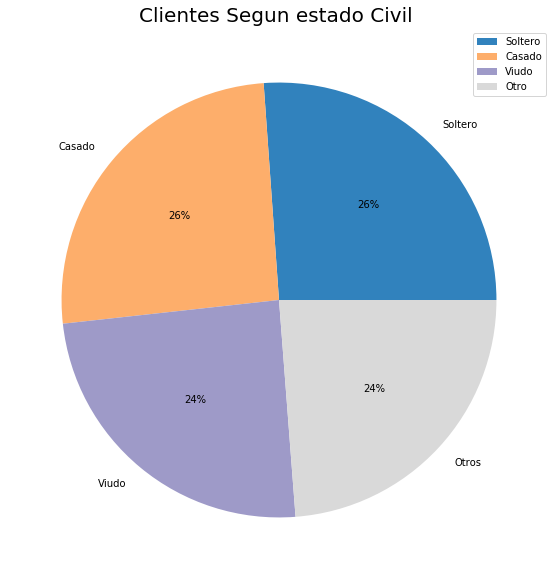

In [34]:
nombres= ["Soltero","Casado","Viudo","Otros"]
df_mini['estado_civil'].value_counts().plot(kind='pie',labels=nombres,legend='reverse', autopct='%1.0f%%', colormap='tab20c')
plt.title("Clientes Segun estado Civil ", size=20)   # Establece el título del gráfico
plt.legend(["Soltero","Casado","Viudo","Otro"])
plt.ylabel("")
plt.show()



## Conclusiones Gráfico 1 ##
* Los estados civiles de los clientes son muy similares.
* Supongo que en otro es separados.
* Ya había concluído que todos tienen hijos, así que no importaría su estado civil con si tienen o no hijos

In [35]:
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1753 entries, 0 to 1752
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   VENTA_ID          1753 non-null   int64         
 1   CAJERO_ID         1753 non-null   int64         
 2   FECHA_VENTA       1753 non-null   datetime64[ns]
 3   MONTO_TOTAL       1753 non-null   float64       
 4   CODIGO_PRODUCTO   1753 non-null   object        
 5   NOMBRE_PRODUCTO   1753 non-null   object        
 6   CODIGO_FAMILIA    1753 non-null   int64         
 7   NOMBRE_FAMILIA    1753 non-null   object        
 8   CANTIDAD          1753 non-null   float64       
 9   id_cliente        1753 non-null   int64         
 10  primer_nombre     1753 non-null   object        
 11  apellido_paterno  1753 non-null   object        
 12  apellido_materno  1753 non-null   object        
 13  correo            1753 non-null   object        
 14  genero            1753 n

## Grafico 2

In [37]:
#Creo la variable de los vendedores ordenando por cantidad de ventas.
cajero_ventas = df_mini[['Nombre_Cajero','MONTO_TOTAL']] #columnas que necesito
suma_CAJEROS = cajero_ventas.groupby('Nombre_Cajero').sum() # devuelve la suma de todos los producod que vendio en total
topcajeros = suma_CAJEROS.sort_values(by='MONTO_TOTAL',ascending= False).head(10)
topcajeros.head()

,MONTO_TOTAL
Nombre_Cajero,
Zelda Wiggins,3674610.0
Hunter Booth,1946907.8
Kaye Bird,681710.0
Ulric Lester,12500.0
Sean Tucker,2900.0


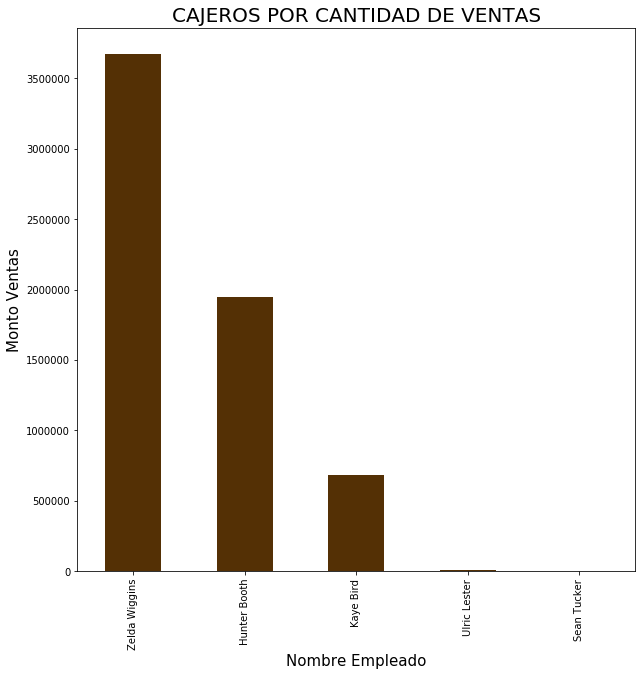

In [38]:
topcajeros.plot(kind='bar', legend=None, colormap='BrBG')
plt.rcParams['figure.figsize']=8,10 # Aumentar tamaño gráfico
plt.title("CAJEROS POR CANTIDAD DE VENTAS", size=20)  
plt.ylabel("Monto Ventas", size=15)   # Establece el título del eje y
plt.xlabel("Nombre Empleado", size=15)   # Establece el título del eje y
plt.show()



## Conclusiones Gráfico 2 ##
* Zelda es la mejor vendedora
* Sean y Ulric  no venden y le dejan la pega  sus compañeros

## Grafico 3

Text(0.5, 1.0, 'FAMILIAS DE PRODUCTOS MÁS VENDIDAS ')

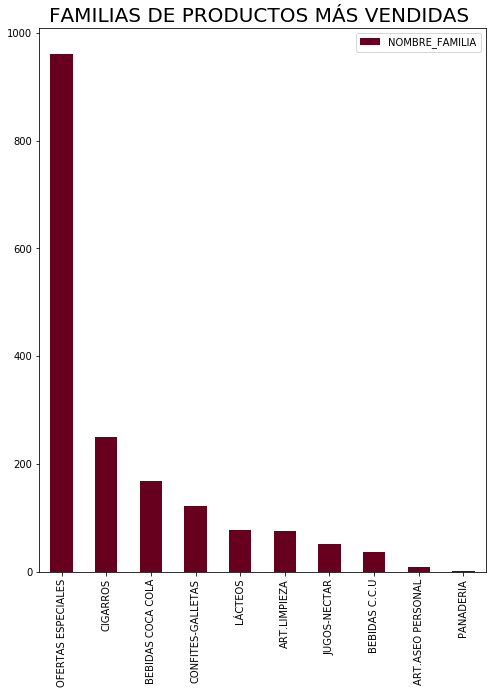

In [39]:
df_mini['NOMBRE_FAMILIA'].value_counts().plot(kind='bar',legend='reverse', colormap='RdBu')
plt.title("FAMILIAS DE PRODUCTOS MÁS VENDIDAS ", size=20)   # Establece el título del gráfico
#legend(['Soltero', 'Casado','Separado'])



## Conclusiones Gráfico 3 ##
* La familia más vendida por mayoria es la de Ofertas Especiales.
* La panadería es la que menos vendio
* Fuera de las ofertas especiales la familia más vendia es : Cigarros.

## Grafico 4

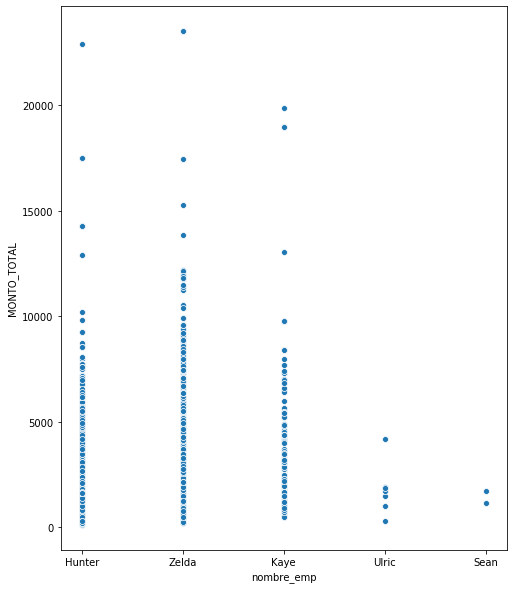

In [55]:
sns.scatterplot(x='nombre_emp', y='MONTO_TOTAL', data=df_mini)

## Conclusiones Gráfico 4 ##
* La mayoria de las ventas son por montos inferiores a 15.000, por ello sería importante que las promociones tenga valores bajos, para incentivar las ventas.
* Las ventas mayores a 20.000 son casos aislados ( outliers)
* Nuevamente vemos que Ulric y Sean casi no venten y además sus ventas no paran de los 5.000 pesos.

## Gráfico 5

In [56]:
#Creo la variable de los vendedores ordenando por cantidad de ventas.
producto_cantidad = df_mini[['NOMBRE_PRODUCTO','CANTIDAD']] #columnas que necesito

suma_producto = df_mini.groupby(['NOMBRE_PRODUCTO'])['CANTIDAD'].sum()
#suma_producto
top_productos = suma_producto.sort_values(ascending = False).head(10)
top_productos.head(10)

NOMBRE_PRODUCTO
Huevo                                  304.0
* TRIAL * TRIAL * TR                    58.0
* TRIAL * TRIAL * TRI                   48.0
* TRIAL * TRIAL * TRIAL * TR            35.0
PALL MALL AZUL DE 20                    34.0
COCACOLA ORIGINAL RETORNABLE 2.0L       30.0
BELMONT DE 20                           28.0
* TRIAL * TRIAL * TRIAL * TRIAL         28.0
* TRIAL * TRIAL * TRIAL                 27.0
COCACOLA RETORNABLE ORIGINAL 1.25L.     27.0
Name: CANTIDAD, dtype: float64

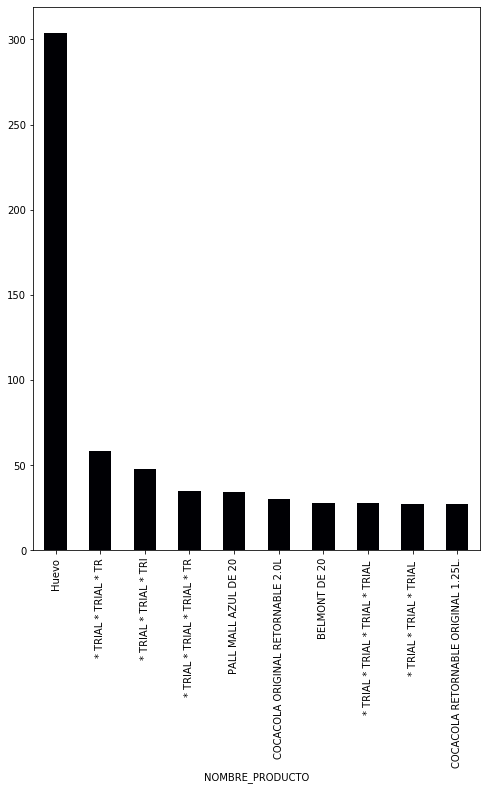

In [57]:
top_productos.plot(kind='bar', colormap='magma')


## Conclusiones Gráfico 5##
* El top de producto más vendido son los Huevos
* Según gráficp anterior debo concluir que debe ser un producto de valor bajo.
* Los trial no sé de que producto se tratan , pero deben ser productos asociados a familia ofertas especiales
* Los cigarros Pall Mall  y las CocaCola están dentro de los top lo cual coincide con las familias más bebidas



## Análisis Bonus Track
* Realizaré un Filtro para salir de la duda que me provoco el grafico aficional u vere que producto están en las familia oferta especiales.
* La familia de Ofertas especiales tiene 353 productos y entre ellos se ven algunos trial 
 

In [59]:
# Creo Filtro por Familia
ofertas = df_mini[(df_mini['NOMBRE_FAMILIA'])=='OFERTAS ESPECIALES']
#Ventas por Familia 
print(ofertas.groupby("NOMBRE_PRODUCTO").size())

NOMBRE_PRODUCTO
 RED BULL ENERGY DRINK 250ml           1
* TRIAL                                1
* TRIAL * T                            2
* TRIAL * TR                           3
* TRIAL * TRI                          2
                                      ..
VIENESAS WINTER 25UN.                  2
VINAGRE VINO BLANCO TRAVERSO 250ml.    1
VIVO AVENA INSTANTANEA 750g.           1
YERBA MATE MATI.500g.                  2
ZAPALLO ITA..                          1
Length: 353, dtype: int64


In [63]:
ofertas = ofertas[['NOMBRE_PRODUCTO','CANTIDAD']] #columnas que necesito
suma_oferta = ofertas.groupby(['NOMBRE_PRODUCTO'])['CANTIDAD'].sum() # suma
top_ofertas = suma_oferta.sort_values(ascending = False).head(10) # el top 10
print(ofertas.head(10))
print(top_ofertas.head(10))


                          NOMBRE_PRODUCTO  CANTIDAD
0                              Costa Rama       1.0
1                                   Huevo      10.0
2            MERMELADA LAGOS DAMASCO 250g       1.0
3                LIPTON YELLOW 40g. 20UN.       1.0
4                 * TRIAL * TRIAL * TRIAL       1.0
5                    ACEITE MERKAT 900ml.       1.0
6                   * TRIAL * TRIAL * TRI       1.0
7              PAN HOT DOG IDEAL 415g 8UN       1.0
8  LECHE CONDENSADA AZUCARADA NESTLE 397g       1.0
9   COCACOLA RETORNABLE SIN AZUCAR 1.25L.       1.0
NOMBRE_PRODUCTO
Huevo                                  304.0
* TRIAL * TRIAL * TR                    58.0
* TRIAL * TRIAL * TRI                   48.0
* TRIAL * TRIAL * TRIAL * TR            35.0
PALL MALL AZUL DE 20                    34.0
COCACOLA ORIGINAL RETORNABLE 2.0L       30.0
BELMONT DE 20                           28.0
* TRIAL * TRIAL * TRIAL * TRIAL         28.0
* TRIAL * TRIAL * TRIAL                 27.0
COCACOL

# Parte número 3
---

## Preparación de la información

* Partiremos agregando la columna de etiqueta que nos servirá para evaluar si los clientes compraran o no  productos de la familia de ofertas especiales
* Para ello crearemos la columna que llamaré Ofertas, donde  las que corresponda a la familia ofertas especiales  quedarán con un 1 y las que no quedarán con un 0

In [43]:
#agregar columna etiqueta
df_mini['Oferta'] = 0
df_mini.head(9)

,VENTA_ID,CAJERO_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD,id_cliente,...,correo,genero,idioma,estado_civil,cant_hijos,edad,estudios,Color_F,Nombre_Cajero,Oferta
0,26,7,2019-08-22 19:43:18,1500.0,7802215104855,Costa Rama,4,CONFITES-GALLETAS,1.0,32,...,jpretselv@army.mil,2.0,Pashto,3.0,4.0,32,Adobe Creative Suite,2.0,Hunter Booth,0
1,6726,2,2019-09-13 19:21:03,2140.0,HUEVO,Huevo,1,OFERTAS ESPECIALES,10.0,32,...,jpretselv@army.mil,2.0,Pashto,3.0,4.0,32,Adobe Creative Suite,2.0,Zelda Wiggins,0
2,14399,2,2019-09-27 22:13:57,5590.0,7802810031112,MERMELADA LAGOS DAMASCO 250g,1,OFERTAS ESPECIALES,1.0,32,...,jpretselv@army.mil,2.0,Pashto,3.0,4.0,32,Adobe Creative Suite,2.0,Zelda Wiggins,0
3,49,7,2019-08-23 14:08:25,4050.0,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,1.0,91,...,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Hunter Booth,0
4,1929,7,2019-04-09 13:24:27,7750.0,7805000305253,* TRIAL * TRIAL * TRIAL,1,OFERTAS ESPECIALES,1.0,91,...,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Hunter Booth,0
5,4127,7,2019-08-09 15:01:21,9270.0,7808743601934,ACEITE MERKAT 900ml.,1,OFERTAS ESPECIALES,1.0,91,...,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Hunter Booth,0
6,8139,7,2019-09-16 11:40:59,3200.0,78019058,* TRIAL * TRIAL * TRI,7,CIGARROS,1.0,91,...,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Hunter Booth,0
7,1651,2,2019-03-09 20:08:35,1500.0,7803473214058,PAN HOT DOG IDEAL 415g 8UN,1,OFERTAS ESPECIALES,1.0,91,...,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Zelda Wiggins,0
8,1735,2,2019-03-09 21:39:08,7300.0,7613030049883,LECHE CONDENSADA AZUCARADA NESTLE 397g,1,OFERTAS ESPECIALES,1.0,91,...,dmaude2i@meetup.com,1.0,Dhivehi,2.0,3.0,26,RV,5.0,Zelda Wiggins,0


Ahora queda identificar las que corresponden a la Familia Ofertas especiales, para que no exiten errore slo haré por el código.

Ya que OFERTAS ESPECIALES ,corresponden al Código de Familia 1

In [44]:
# Aquellos que son familia Ofertas especiales (codigo_familia ==1 ) dejare la etique en 1 
df_mini.loc[df_mini.CODIGO_FAMILIA == 1, 'Oferta'] = 1


#### Ahora que está esa parte lista podre sacar las caracteristicas de la data a trabajar.
* Lo importante acá son los datos de los clientes, porque esos son los datos que contiene el Datamart.
* La mayoría de los datos  tiene baja correlación, pero a mi estimación de los datos de los cliente lo más relevante es el genero , el estado civil y la cantidad de hijos , creo que el idioma no es un factor de correlación porque son 97 idiomas
* Así que, en la preparación de datas para poder entrenar la data ocupare :  'genero', 'estado_civil' e 'cant_hijos'

In [45]:
# Seleccionaré los datos qu me serviran para entrenar la data
#df_mini.info()
caracteristicas =[
  'genero',
  'estado_civil', 
  'cant_hijos']
data = df_mini[caracteristicas][1:] # X
clas = df_mini["Oferta"][1:] # Y
print(data,clas)

      genero  estado_civil  cant_hijos
1        2.0           3.0         4.0
2        2.0           3.0         4.0
3        1.0           2.0         3.0
4        1.0           2.0         3.0
5        1.0           2.0         3.0
...      ...           ...         ...
1748     1.0           2.0         2.0
1749     1.0           3.0         2.0
1750     1.0           3.0         2.0
1751     2.0           3.0         1.0
1752     2.0           3.0         1.0

[1752 rows x 3 columns] 1       1
2       1
3       1
4       1
5       1
       ..
1748    0
1749    0
1750    0
1751    1
1752    0
Name: Oferta, Length: 1752, dtype: int64


## Separación de la información (prueba, entrenamiento)

#### La forma de Repeat Kfolds no me dejaba especificar el 28% y el 72% , por eso pase a  este modelo de selección que si me dejaba.
* Indicando : los datos de entramient y test para X e Y 

In [103]:
x_train,x_test, y_train, y_test = train_test_split(data,clas,train_size=0.72, test_size=0.28, random_state =8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1261, 3)
(491, 3)
(1261,)
(491,)


#### Para que preparar mejor la data de daremos algunos  metodos de scikit learn.
(Para que no me pase lo de la bicicleta)
* Dare Normalización, Estandarización y MinMax

In [69]:
#Normalizacion de los datos
normalizacion = preprocessing.Normalizer() # Creo Variable 
normalizacion_entrenamiento = normalizacion.fit_transform(x_train) #Le paso x de entrenamiento
normalizacion_prueba = normalizacion.transform(x_test) # Le paso x de prueba

#Estandarizacion de los datos
estandarizacion = preprocessing.StandardScaler()# Creo Variable 
estandarizacion_entrenamiento = estandarizacion.fit_transform(x_train) #Le paso x de entrenamiento
estandarizacion_prueba = estandarizacion.transform(x_test) # Le paso x de prueba 

#Usando MinMaxScaler en los datos
minmax = preprocessing.MinMaxScaler() # Creo Variable 
minmax_entrenamiento = minmax.fit_transform(x_train) #Le paso x de entrenamiento
minmax_prueba = minmax.transform(x_test) # Le paso x de prueba 

## Busqueda del mejor modelo
* Ahora busqué los 6 modelos pra trabajar.
* Los 6 modelos elegidos son :
        * Naive Bayes
        * Linear Support Vector Machines
        * Generalized Linear Regression Stochastic Gradient Descent (SGD)
        * RandomForest
        * Ridge Classification
        * Gaussian Procees Classificación (GPC)
        * Multi -Layer Perceptron Classifier
* Los mostraré en un for para no ocupar tantas lineas , luego volveré a pasar los que vea más alto para asegurarme que estpan vien, porque.... insegura

In [61]:

modelos = [] # Variable Modelos
modelos.append(("GNV",GaussianNB()))#Naive Bayes
modelos.append(("LSVC",LinearSVC()))#linear Support Vector Machines
modelos.append(("SGDClass",SGDClassifier())) #Generalized Linear Regression Stochastic Gradient Descent - SGD
modelos.append(("RFC",RandomForestClassifier()))# RAMDOMFORRST
modelos.append(("LinearRidgeClass",linear_model.RidgeCV())) #Ridge classification
modelos.append(("GPClass", GaussianProcessClassifier())) # Gaussian process classification (GPC)
modelos.append(("MLPC",MLPClassifier())) #multi-layer perceptron (MLP)

#No me resultaron :c
#modelos.append(("KA-RBFSampler",RBFSampler())) #Kernel Approximation Random Kitchen Sinks
#modelos.append(("VClass",VotingClassifier()))#Majority Class Labels Voting Classifier

# FOR Para Estandarización
for nombre,modelo in modelos:
  modelo.fit(estandarizacion_entrenamiento,y_train)
  resultado = modelo.score(estandarizacion_prueba,y_test)
  print("Por Estadarización el modelo de: {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo=nombre,
      presi=resultado*100
  ))


#FOR para Normalización
for nombre,modelo in modelos:
  modelo.fit(normalizacion_entrenamiento,y_train)
  resultado = modelo.score(normalizacion_prueba,y_test)
  print("Por Nomalización el modelo de : {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo=nombre,
      presi=resultado*100
  ))

#FOR para MinMaxScaler
for nombre,modelo in modelos:
  modelo.fit(minmax_entrenamiento,y_train)
  resultado = modelo.score(minmax_prueba,y_test)
  print("Por MinMaxScaler el modelo de: {modelo}, tiene una presición de {presi:.3f}%".format(
      modelo=nombre,
      presi=resultado*100
  ))

Por Estadarización el modelo de: GNV, tiene una presición de 56.212%
Por Estadarización el modelo de: LSVC, tiene una presición de 58.248%
Por Estadarización el modelo de: SGDClass, tiene una presición de 53.360%
Por Estadarización el modelo de: RFC, tiene una presición de 50.713%
Por Estadarización el modelo de: LinearRidgeClass, tiene una presición de -2.898%
Por Estadarización el modelo de: GPClass, tiene una presición de 49.287%
Por Estadarización el modelo de: MLPC, tiene una presición de 49.695%
Por Nomalización el modelo de : GNV, tiene una presición de 56.823%
Por Nomalización el modelo de : LSVC, tiene una presición de 58.248%
Por Nomalización el modelo de : SGDClass, tiene una presición de 60.285%
Por Nomalización el modelo de : RFC, tiene una presición de 50.102%
Por Nomalización el modelo de : LinearRidgeClass, tiene una presición de -2.766%
Por Nomalización el modelo de : GPClass, tiene una presición de 58.452%
Por Nomalización el modelo de : MLPC, tiene una presición de 6

## **Los Valoes de presición más alto se encontraron en :**

### * Por Nomalización el modelo de : SGDClass, tiene una presición de 60.285%
### * Por Nomalización el modelo de : MLPC, tiene una presición de 60.081%
### * Por MinMaxScaler el modelo de: SGDClass, tiene una presición de 60.285%

* Ya que  tengo los más altos los pasaré solitos 


## Elección del mejor modelo

* ¿Cómo haré la elección?
    * Crearé las normzalizacion para cada uno de ellos pensando que los valores me han cambiado a tirar  una y otras vez la presición quizá se re-escriben 
    * Y volveré a pasar por cada uno , con eso tomaré la desición

In [104]:
#Normalizacion de los datos para SGDClass
normalizacion_SGDC = preprocessing.Normalizer() # Creo Variable 
normalizacion_entrenamientoSGDC = normalizacion_SGDC.fit_transform(x_train) #Le paso x de entrenamiento
normalizacion_pruebaSGDC = normalizacion_SGDC.transform(x_test) # Le paso x de prueba

In [105]:
SGDClass = SGDClassifier()# Nombre variable
sgdc = SGDClass.fit(normalizacion_entrenamientoSGDC,y_train) # Le paso la data de entrenamiento pasada por normización y MLPC
sgdc_precision = sgdc.score(normalizacion_pruebaSGDC, y_test) # Le paso la data de prueba pasada por normización y MLPC
prediccion_sgdc = sgdc.predict(normalizacion_pruebaSGDC) # Calculo de Presición
print("Precision de SGD Classifier Normalizado {:.2f}%".format(mlpc_precision * 100))

Precision de SGD Classifier Normalizado 60.29%


In [108]:
#Normalizacion de los datos para MLPClassifier
normalizacion_MLPC = preprocessing.Normalizer() # Creo Variable 
normalizacion_entrenamientoMLPC = normalizacion_MLPC.fit_transform(x_train) #Le paso x de entrenamiento
normalizacion_pruebaMLPC = normalizacion_MLPC.transform(x_test) # Le paso x de prueba

In [109]:
 # Saco solo el MLPC para poder sacar el train
MLPC = MLPClassifier() # Nombre variable
mlpc = MLPC.fit(normalizacion_entrenamientoMLPC,y_train) # Le paso la data de entrenamiento pasada por normización y MLPC
mlpc_precision = mlpc.score(normalizacion_pruebaMLPC, y_test) # Le paso la data de prueba pasada por normización y MLPC
prediccion_mlpc = mlpc.predict(normalizacion_pruebaMLPC) # Calculo de Presición
print("Precision de MLPC Normalizado {:.2f}%".format(mlpc_precision * 100))

Precision de MLPC Normalizado 60.49%


#### En este caso me salio una precisión  más alta en MLPC  de 60.49% VS. el 60.29% de SGD Classifier
* Me quedaré con MPLC

## Uso del mejor modelo

In [110]:
# Entreno la Base

prediccion = mlpc.predict(normalizacion_pruebaMLPC)
print(prediccion, "\n", y_test)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1] 
 9

Según la predicción la mayoria comprará, buen dato para el MiniMarket
* Ahora que yo tenía datamart creado y modificado , le dice que lo deje con las características 

In [111]:
#Al datamart le paso caracteristicas que ya existia
datamart_mini= datamart[caracteristicas]
datamart_mini.head() #Lomuestro para ver que estoy okis dokis


,genero,estado_civil,cant_hijos
0,1.0,3.0,1.0
1,2.0,1.0,2.0
2,2.0,4.0,3.0
3,2.0,1.0,4.0
4,2.0,2.0,1.0


In [114]:
#mlpc.predict([[1,4,3]])  # Este fue para probar el predict antes de crear el for 

for id,x in enumerate(datamart_mini.values): 
    print("El cliente N°{} : {}".format(
        id,
        (mlpc.predict([x])==1 and 'Comprará y todos seremos felices' or "No Comprará y lloraremos")
    ))


El cliente N°0 : Comprará y todos seremos felices
El cliente N°1 : Comprará y todos seremos felices
El cliente N°2 : Comprará y todos seremos felices
El cliente N°3 : Comprará y todos seremos felices
El cliente N°4 : Comprará y todos seremos felices
El cliente N°5 : Comprará y todos seremos felices
El cliente N°6 : Comprará y todos seremos felices
El cliente N°7 : Comprará y todos seremos felices
El cliente N°8 : Comprará y todos seremos felices
El cliente N°9 : Comprará y todos seremos felices
El cliente N°10 : Comprará y todos seremos felices
El cliente N°11 : Comprará y todos seremos felices
El cliente N°12 : Comprará y todos seremos felices
El cliente N°13 : Comprará y todos seremos felices
El cliente N°14 : Comprará y todos seremos felices
El cliente N°15 : Comprará y todos seremos felices
El cliente N°16 : Comprará y todos seremos felices
El cliente N°17 : Comprará y todos seremos felices
El cliente N°18 : Comprará y todos seremos felices
El cliente N°19 : Comprará y todos seremo

## *  No se parece mucho al predict  incial , pero si puedo  es poca la frecuencia con la que aparece  al igual que en la de predicción, considerando que la presición no fue tan alta.


## * Y estoy conforme con el resultado , porque salio , me costo más hacer los for para poder pasarle el datamart 